In [20]:
from keras.datasets import mnist 
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation
from matplotlib import pyplot as plt # import pyplot alias plt for plotting 
from sklearn.metrics import confusion_matrix 
import seaborn as sns

# Load datatset, preprocessing

In [5]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
input_dim = 784 #28*28 
X_train = X_train.reshape(60000, input_dim) 
X_test = X_test.reshape(10000, input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255

In [9]:
output_dim = nb_classes = 10

In [10]:
Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
Y_train.shape

(60000, 10)

# Logistic Regression model in Keras


In [12]:
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 128 
nb_epoch = 100

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2866 - accuracy: 0.9199 - val_loss: 0.2776 - val_accuracy: 0.9222
Epoch 2/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.2781 - accuracy: 0.9221 - val_loss: 0.2749 - val_accuracy: 0.9236
Epoch 3/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.2724 - accuracy: 0.9238 - val_loss: 0.2720 - val_accuracy: 0.9242
Epoch 4/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2678 - accuracy: 0.9255 - val_loss: 0.2677 - val_accuracy: 0.9248
Epoch 5/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.2640 - accuracy: 0.9264 - val_loss: 0.2679 - val_accuracy: 0.9240
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2614 - accuracy: 0.9275 - val_loss: 0.2647 - val_accuracy: 0.9255
Epoch 7/100
60000/60000 [==============================] - 1s 

In [28]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

KeyError: 'acc'

In [29]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

KeyError: 'acc'

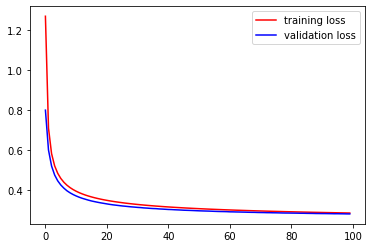

In [37]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

# Inference 

In [17]:
predictions = model.predict_classes(X_test)

In [18]:
predictions[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [44]:
np.argmax(Y_test[0])

7

In [51]:
y_test = np.argmax(Y_test, axis=1)

In [50]:
Y_test.shape

(10000, 10)

In [52]:
y_test.shape

(10000,)

# Misclassified Images

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

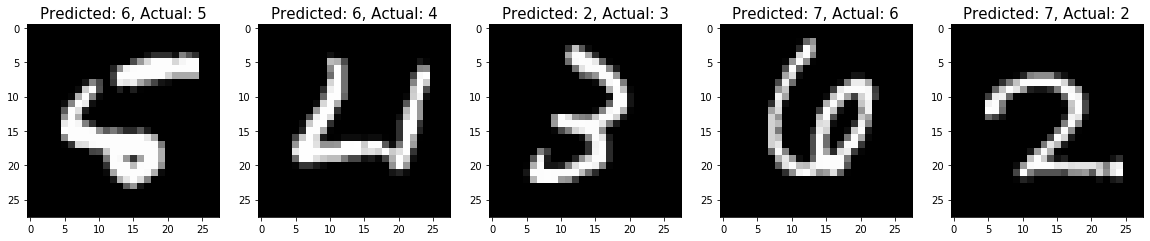

In [55]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

# Confusion Matrix

In [22]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


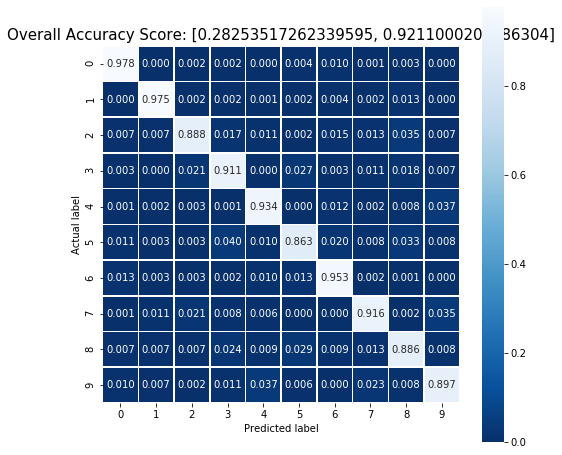

In [25]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();